# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

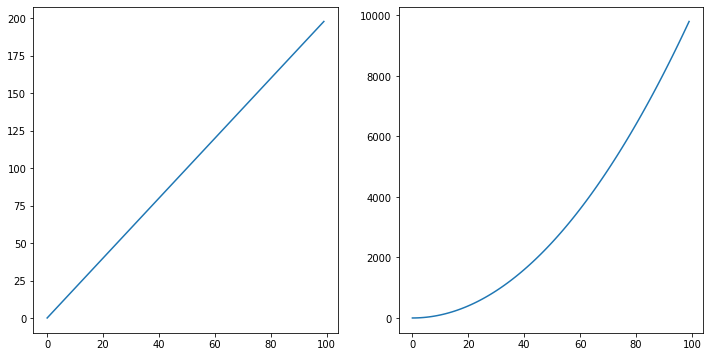

In [20]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(x,y)
plt.subplot(1,2,2)
plt.plot(x,z)

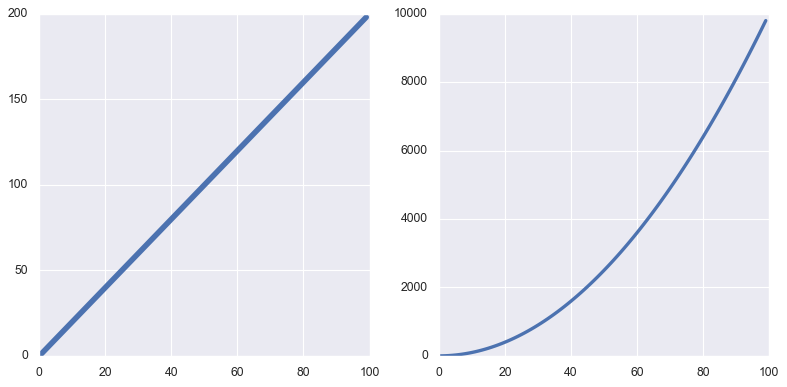

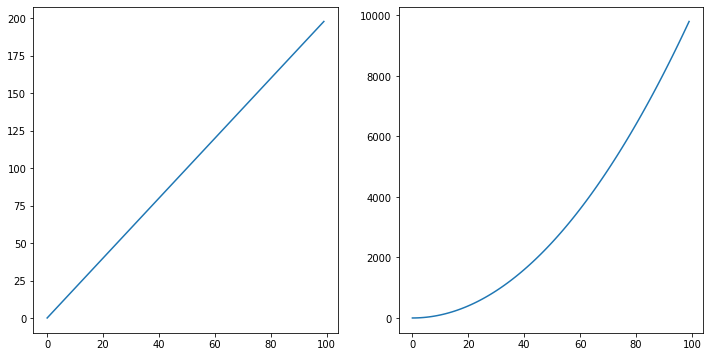

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

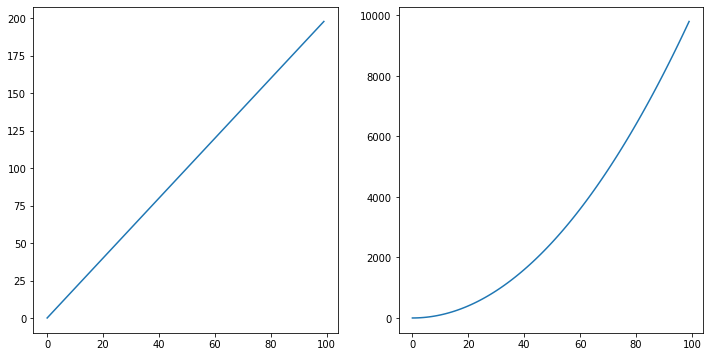

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].plot(x,y)
ax[1].plot(x,z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

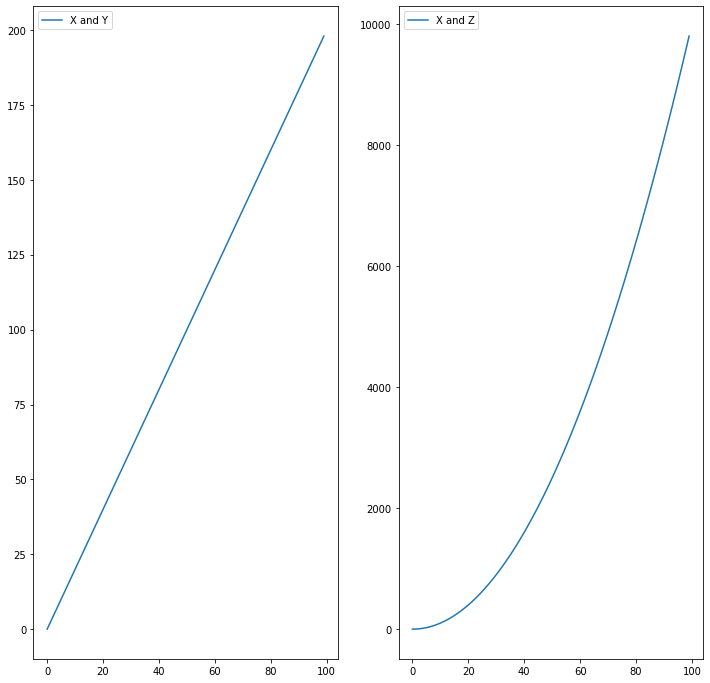

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
ax[0].plot(x,y, label="X and Y")
ax[1].plot(x,z, label="X and Z")
for i in ax:
    i.legend(loc="upper left")

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

#### As a bonus challenge, try to add a legend to the plot.

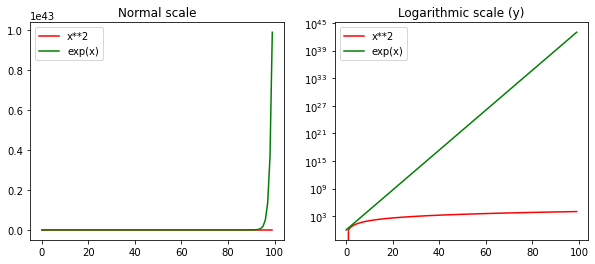

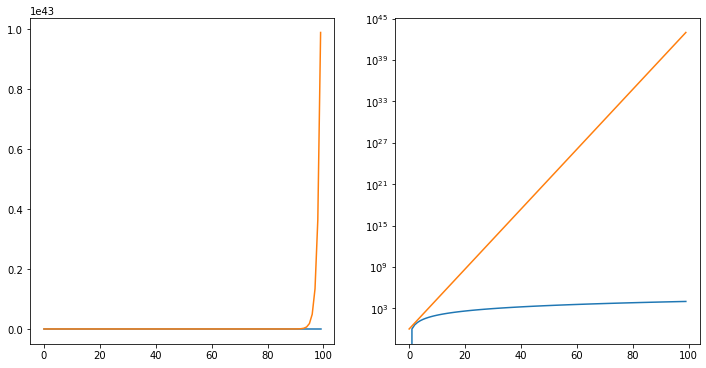

In [30]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

ax1[0].plot(x**2, label="x**2")
ax1[0].plot(np.e**x, label="exp(x)")
ax1[1].set_yscale("log")
ax1[1].plot(x**2, label="x**2")
ax1[1].plot(np.e**x, label="exp(x)")

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [33]:
fitbit2 = pd.read_csv("/Users/m.soren/Downloads/Datasets%20as%20CSV/Fitbit2.csv")


In [34]:
fitbit2.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [56]:
workdays_df = fitbit2[fitbit2["Work_or_Weekend"]==1]
weekend_df = fitbit2[fitbit2["Work_or_Weekend"]==0]
avg_per_month_wd = workdays_df.groupby("Months_encoded").agg({"Steps": "mean"})
avg_per_month_we = weekend_df.groupby("Months_encoded").agg({"Steps": "mean"})
avg_per_month = fitbit2.groupby("Months_encoded").agg({"Steps": "mean"})



In [51]:
avg_per_month_wd

,Steps
Months_encoded,
1,10022.380952
2,8210.363636
3,12181.347826
4,15133.333333
5,8531.619048
6,12470.363636
7,9312.391304
8,11166.619048
9,9680.272727


In [75]:
months = []
for i in range(1,13):
    months.append(calendar.month_abbr[i])
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

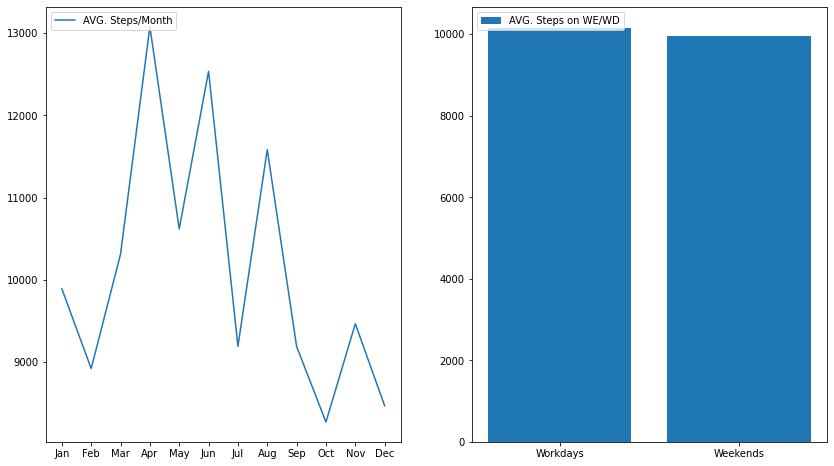

In [80]:
import calendar
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

ax2[0].plot(months, avg_per_month["Steps"], label="AVG. Steps/Month")
ax2[1].bar(["Workdays", "Weekends"],[avg_per_month_wd["Steps"].mean(), avg_per_month_we["Steps"].mean()], label="AVG. Steps on WE/WD")
for i in ax2:
    i.legend(loc="upper left")

([<matplotlib.axis.XTick at 0x1c4ac3ec220>,
 [Text(0, 0, 'Weekend'), Text(0, 0, 'Workdays')])

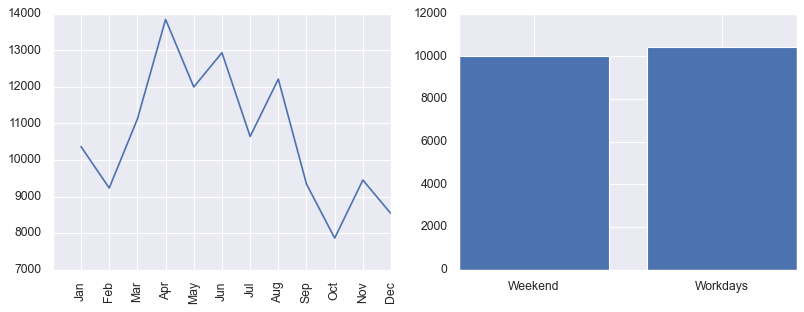

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

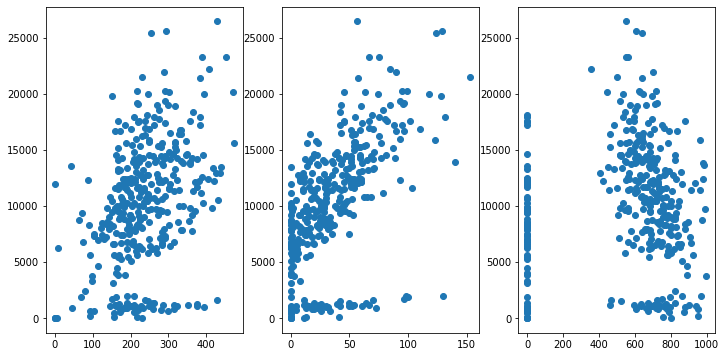

In [83]:
fig3, ax3 = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

ax3[0].scatter(fitbit2["Minutes Lightly Active"], fitbit2["Steps"])
ax3[1].scatter(fitbit2["Minutes Very Active"], fitbit2["Steps"])
ax3[2].scatter(fitbit2["Minutes Sedentary"], fitbit2["Steps"])


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [84]:
titanic = pd.read_csv("/Users/m.soren/Downloads/Datasets%20as%20CSV/titanic.csv")


#### Explore the titanic dataset using Pandas dtypes.

In [86]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [92]:
titanic.select_dtypes("object").columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [95]:
titanic.select_dtypes(["float64","int64"]).columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [136]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')



In [97]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Use the right visulalization to show the distribution of column `Age`.

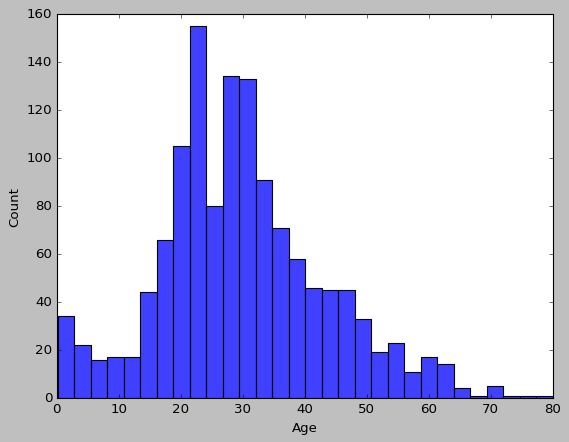

In [111]:
ax = sns.histplot(x="Age", data=titanic)



#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

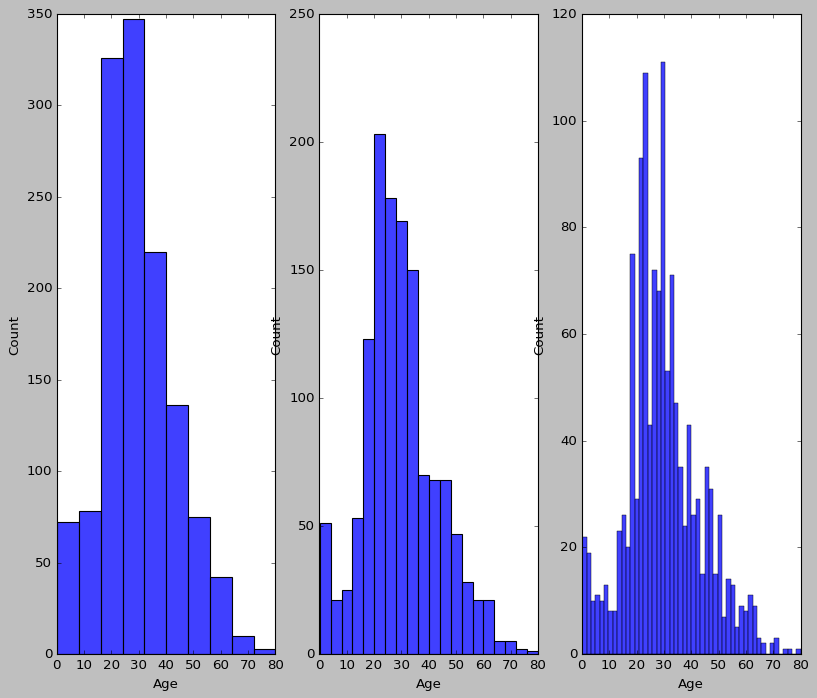

In [115]:
fig4, ax4 = plt.subplots(nrows=1, ncols=3, figsize=(12,10))

sns.histplot(x="Age", data=titanic, bins=10, ax=ax4[0])
sns.histplot(x="Age", data=titanic, bins=20, ax=ax4[1])
sns.histplot(x="Age", data=titanic, bins=50, ax=ax4[2])




#### How does the bin size affect your plot?

In [116]:
print("The lower the bin size the more rounded the edges become, but the more 'Data' you loose. YOu can not read as much out of the graph with the 10 bin size as with the 50 bin size.")

The lower the bin size the more rounded the edges become, but the more 'Data' you loose. YOu can not read as much out of the graph with the 10 bin size as with the 50 bin size.


#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

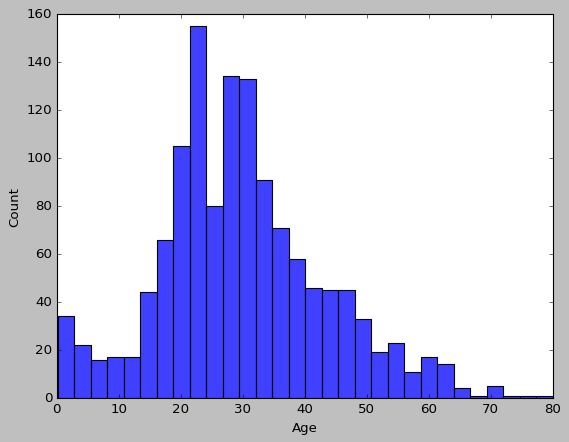

In [117]:
sns.histplot(x="Age", data=titanic)


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

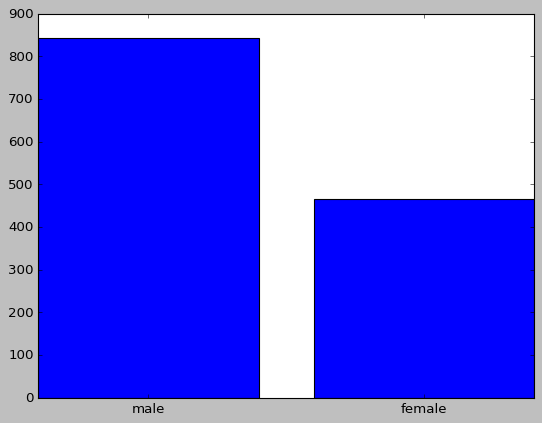

In [121]:
plt.bar(titanic["Gender"].unique(), titanic["Gender"].value_counts())

<AxesSubplot:ylabel='Gender'>

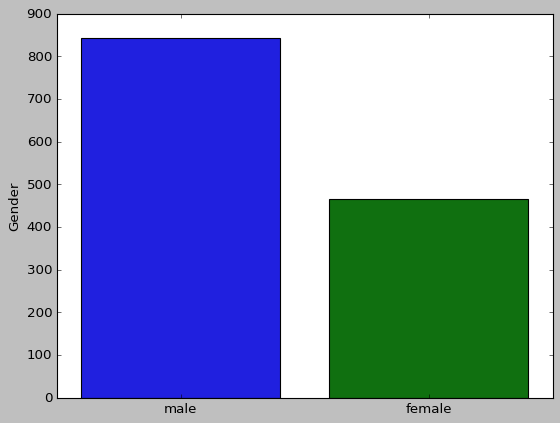

In [124]:
sns.barplot(x=titanic["Gender"].unique(), y=titanic["Gender"].value_counts())

<BarContainer object of 2 artists>

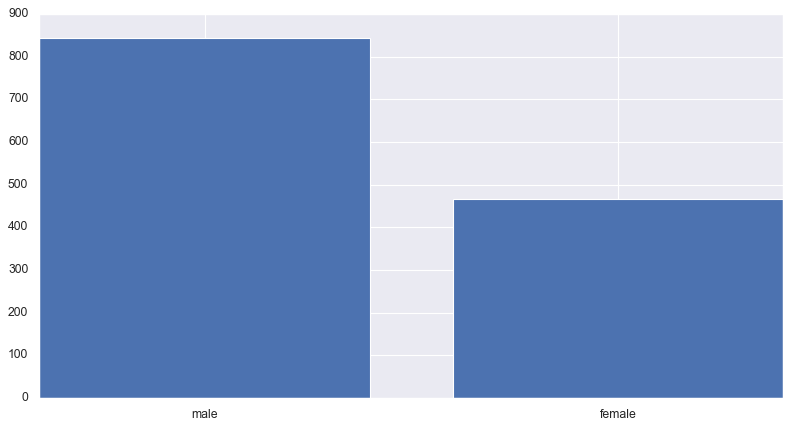

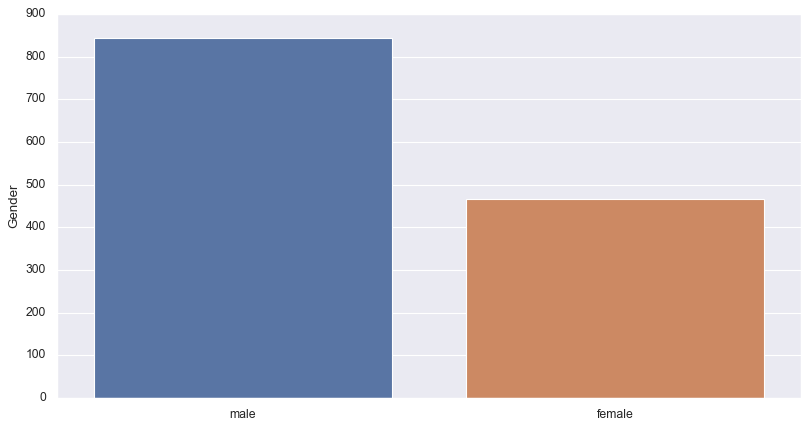

In [64]:
# Method 2 - seaborn
# your code here


#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:ylabel='Pclass'>

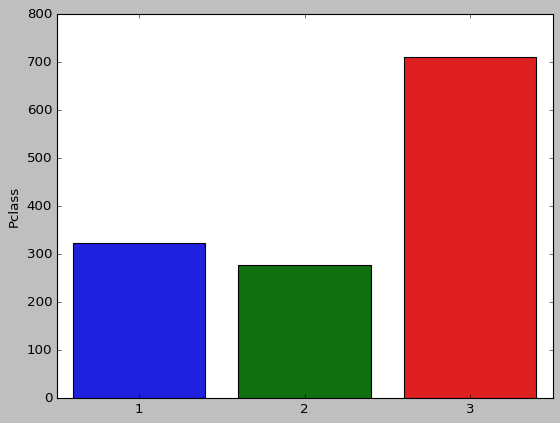

In [125]:
sns.barplot(x=titanic["Pclass"].unique(), y=titanic["Pclass"].value_counts())


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:ylabel='Age'>

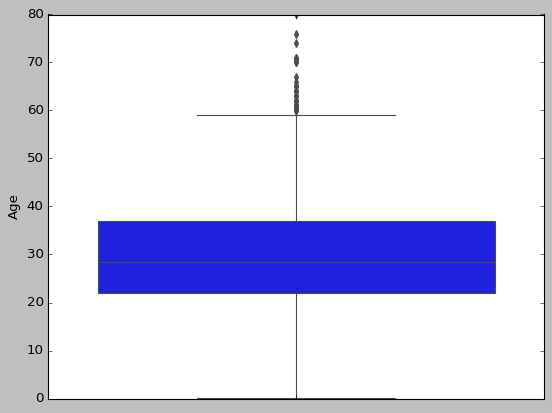

In [129]:
sns.boxplot(y=titanic["Age"])



#### What does the last plot tell you about the feature `Age`?

In [ ]:
print("That most poeple were ages between mid 20's and the late 30's. Although there are outliers that are above the 60year range.")

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:ylabel='Age'>

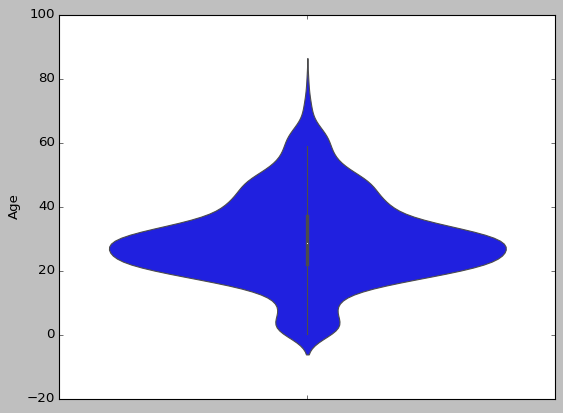

In [131]:
sns.violinplot(y=titanic["Age"])

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
print("Not much additional information?")

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

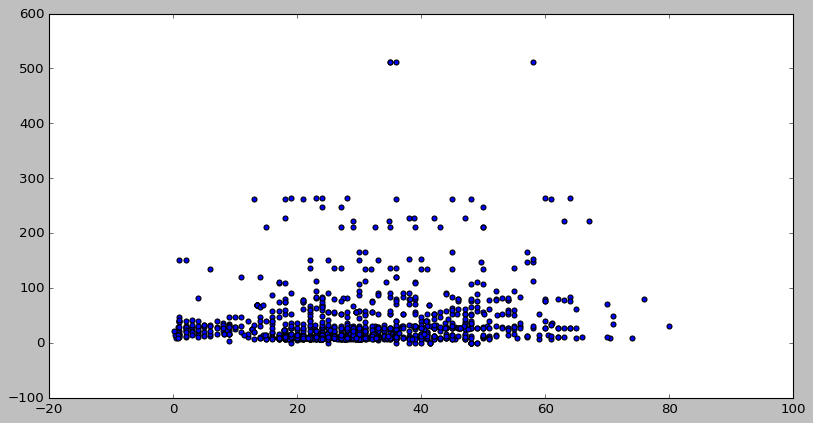

In [133]:
fig6, ax6 = plt.subplots(figsize=(12,6))

ax6.scatter(x=titanic["Age"], y=titanic["Fare"])


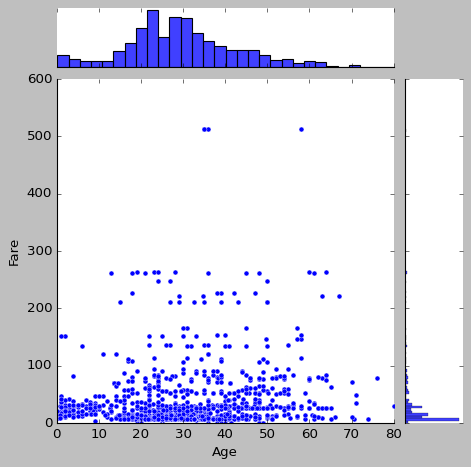

In [134]:
sns.jointplot(x=titanic["Age"], y=titanic["Fare"])


#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

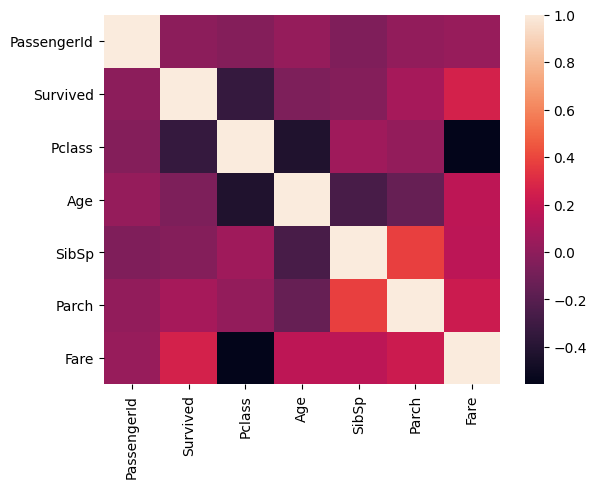

In [142]:
corr = titanic.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### What are the most correlated features?

In [ ]:
print("Survived and Fare ssem to be one of the highest related columns")

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

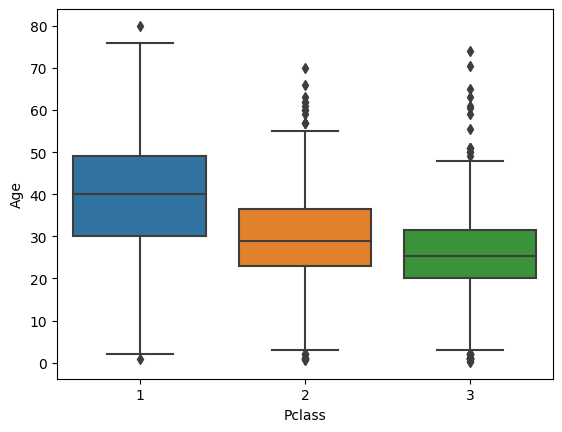

In [144]:
sns.boxplot(y=titanic["Age"], x=titanic["Pclass"])


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

AttributeError: 'Rectangle' object has no property 'kind'

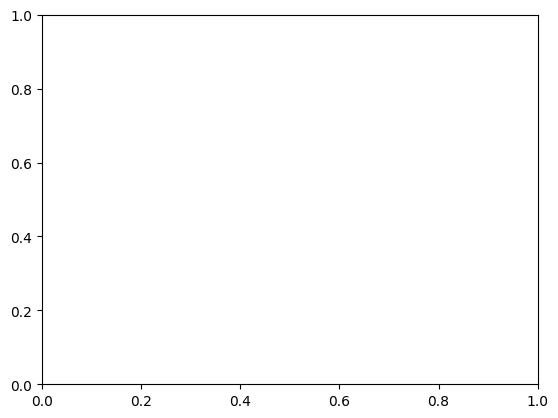

In [151]:
sns.barplot(x=titanic["Age"], y=titanic["Age"].value_counts(), hue=titanic["Gender"], kind="bar")

(array([ 31.,  33., 100., 117.,  83.,  48.,  28.,  19.,   6.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <a list of 10 Patch objects>)

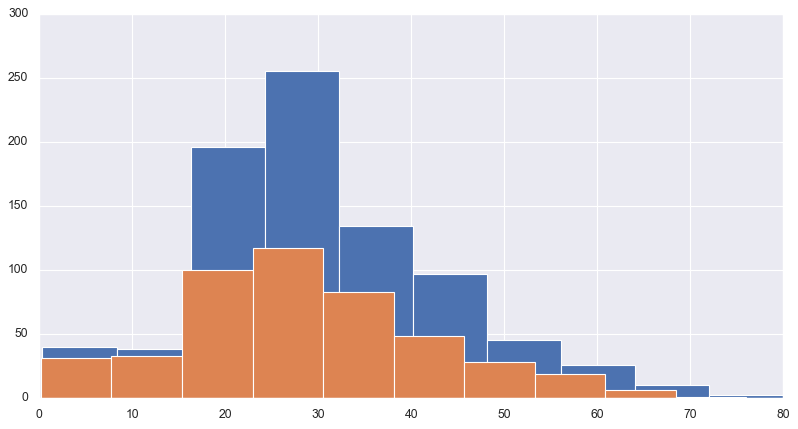